<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Python-Setup" data-toc-modified-id="Python-Setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Python Setup</a></span><ul class="toc-item"><li><span><a href="#Change-the-width-of-the-page" data-toc-modified-id="Change-the-width-of-the-page-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Change the width of the page</a></span></li><li><span><a href="#Import-packages" data-toc-modified-id="Import-packages-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Import packages</a></span></li></ul></li><li><span><a href="#Colours" data-toc-modified-id="Colours-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Colours</a></span></li><li><span><a href="#Study-Totals" data-toc-modified-id="Study-Totals-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Study Totals</a></span></li><li><span><a href="#VAF-data" data-toc-modified-id="VAF-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>VAF data</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Jaiswal-2014" data-toc-modified-id="Jaiswal-2014-4.0.1"><span class="toc-item-num">4.0.1&nbsp;&nbsp;</span>Jaiswal 2014</a></span></li><li><span><a href="#Genovese-2014" data-toc-modified-id="Genovese-2014-4.0.2"><span class="toc-item-num">4.0.2&nbsp;&nbsp;</span>Genovese 2014</a></span></li><li><span><a href="#Zink-WGS-2017" data-toc-modified-id="Zink-WGS-2017-4.0.3"><span class="toc-item-num">4.0.3&nbsp;&nbsp;</span>Zink WGS 2017</a></span></li><li><span><a href="#Acuna-Hidalgo-2017" data-toc-modified-id="Acuna-Hidalgo-2017-4.0.4"><span class="toc-item-num">4.0.4&nbsp;&nbsp;</span>Acuna-Hidalgo 2017</a></span></li><li><span><a href="#Coombs-2017" data-toc-modified-id="Coombs-2017-4.0.5"><span class="toc-item-num">4.0.5&nbsp;&nbsp;</span>Coombs 2017</a></span></li><li><span><a href="#McKerrel-2015" data-toc-modified-id="McKerrel-2015-4.0.6"><span class="toc-item-num">4.0.6&nbsp;&nbsp;</span>McKerrel 2015</a></span></li><li><span><a href="#Young-2016" data-toc-modified-id="Young-2016-4.0.7"><span class="toc-item-num">4.0.7&nbsp;&nbsp;</span>Young 2016</a></span></li><li><span><a href="#Young-2019" data-toc-modified-id="Young-2019-4.0.8"><span class="toc-item-num">4.0.8&nbsp;&nbsp;</span>Young 2019</a></span></li><li><span><a href="#Desai-2018" data-toc-modified-id="Desai-2018-4.0.9"><span class="toc-item-num">4.0.9&nbsp;&nbsp;</span>Desai 2018</a></span></li></ul></li></ul></li><li><span><a href="#Deciding-where-to-trim-the-data-(using-DNMT3A)" data-toc-modified-id="Deciding-where-to-trim-the-data-(using-DNMT3A)-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Deciding where to trim the data (using DNMT3A)</a></span></li></ul></div>

# Python Setup

## Change the width of the page

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

## Import packages

In [1]:
# import packages
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import matplotlib.ticker as plticker
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib.patches import Polygon
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from matplotlib import cm
import scipy.special
import scipy.integrate as it
from scipy import integrate
from scipy.interpolate import interp1d
from scipy.stats import kde
import copy
import glob, os
import re
from sklearn import datasets, linear_model
import pandas as pd
from decimal import *
from operator import itemgetter    
from collections import OrderedDict

# Colours

In [3]:
DNMT3Acolor = 'dodgerblue'

# Study Totals

In [4]:
Jaiswaltotal = 17182
Genovesetotal = 12380
McKerreltotal = 4219
Youngtotal = 20
Young2019totalcontrols = 69 #only include controls
ZinkWGStotal = 11262
Acunatotal = 2006
Coombstotal = 1591 #only including those who were chemo- and radio- naive
Desaitotal = 181

# VAF data

### Jaiswal 2014

In [5]:
# DNMT3A - create a dictionary of all the DNMT3A missense and nonsense variants (with row_count as key)
import csv
filename="Jaiswal_2014_SNVs.csv" #CSV file containing only the SNVs reported in Jaiswal 2014

with open(filename, 'r') as csvfile:
    read_reader = csv.reader(csvfile) #csv.reader returns a reader object which will iterate over lines in the csvfile
    row_count=0
    Jaiswal_DNMT3A_missense_nonsense={} #dictionary of DNMTA missense and nonsense results

    for row in read_reader:
        if row_count>0: #ignore the header of the CSV file
            if row[0]=='DNMT3A': #only look at the DNMT3A results
                VAF = row[10] #VAF
                ID = row[13] #participant ID
                mutation_type = row[6] #whether the variant is missense or nonsense or synonymous
                AA = row[7] #AA change, e.g. V617F
                if mutation_type == 'nonsense':
                    Jaiswal_DNMT3A_missense_nonsense[row_count]=(ID, VAF, mutation_type, AA)
                if mutation_type == 'missense':
                    Jaiswal_DNMT3A_missense_nonsense[row_count]=(ID, VAF, mutation_type, AA)

        row_count=row_count+1

Jaiswal_DNMT3A_missense_nonsense_sorted = sorted(Jaiswal_DNMT3A_missense_nonsense.items(), key=lambda x: x[1][1], reverse=True) #sort the results by VAF

### Genovese 2014

In [6]:
# DNMT3A - create a dictionary of all the DNMT3A missense and nonsense variants (with row_count as key)
import csv
filename="Genovese_2014_SNVs.csv" #CSV file containing only the SNVs reported in Genovese 2014

with open(filename, 'r') as csvfile:
    read_reader = csv.reader(csvfile)  #csv.reader returns a reader object which will iterate over lines in the csvfile
    row_count=0
    Genovese_DNMT3A_missense_nonsense={} #dictionary of DNMTA missense and nonsense results
    
    for row in read_reader:
        if row_count>0:  #ignore the header of the CSV file
            if row[8]=='DNMT3A': #only look at the DNMT3A results
                VAF = (float(row[6])/((float(row[5]))+(float(row[6]))))  # VAF = (alt count/(ref count + alt count))
                mutation_type = row[10] #whether the variant is missense or nonsense or synonymous
                AA = row[11] #AA change, e.g. V617F
                if mutation_type == 'missense': 
                    Genovese_DNMT3A_missense_nonsense[row_count]=(row_count, VAF, mutation_type, AA)
                if mutation_type == 'nonsense':
                    Genovese_DNMT3A_missense_nonsense[row_count]=(row_count, VAF, mutation_type, AA)

        row_count=row_count+1
    
Genovese_DNMT3A_missense_nonsense_sorted = sorted(Genovese_DNMT3A_missense_nonsense.items(), key=lambda x: x[1][1], reverse=True) #sort the results by VAF 

### Zink WGS 2017

In [7]:
# DNMT3A - create a dictionary of all the DNMT3A missense and nonsense variants (with row_count as key)
import csv
filename="ZinkWGS_2017_SNVs.csv" #CSV file containing only the SNVs reported by whole genome sequencing in Zink 2017

with open(filename, 'r') as csvfile:
    read_reader = csv.reader(csvfile)  #csv.reader returns a reader object which will iterate over lines in the csvfile
    row_count=0
    ZinkWGS_DNMT3A_missense_nonsense={} #dictionary of DNMTA missense and nonsense results
    
    for row in read_reader:
        if row_count>0: #ignore the header of the CSV file
            if row[4]=='DNMT3A': #only look at the DNMT3A results
                VAF = float(row[5])
                ID = row[6] #participant ID
                age = float(row[8])
                AA = row[10] #AA change, e.g. V617F
                mutation_type = row[9] #whether the variant is missense or nonsense or synonymous
                if mutation_type == 'missense':
                    ZinkWGS_DNMT3A_missense_nonsense[row_count]=(ID, VAF, age, AA, mutation_type)
                if mutation_type == 'nonsense':
                    ZinkWGS_DNMT3A_missense_nonsense[row_count]=(ID, VAF, age, AA, mutation_type)

        row_count=row_count+1

ZinkWGS_DNMT3A_missense_nonsense_sorted = sorted(ZinkWGS_DNMT3A_missense_nonsense.items(), key=lambda x: x[1][1], reverse=True) #sort the results by VAF 

### Acuna-Hidalgo 2017

In [8]:
# DNMT3A - create a dictionary of all the DNMT3A missense and nonsense variants (with row_count as key)
filename="Acuna_Hidalgo_2017_SNVs.csv" #CSV file containing only the SNVs reported in Acuna-Hidalgo 2017

with open(filename, 'r') as csvfile:
    read_reader = csv.reader(csvfile)  #csv.reader returns a reader object which will iterate over lines in the csvfile
    row_count=0
    Acuna_DNMT3A_missense_nonsense={} #dictionary of DNMTA missense and nonsense results
    
    for row in read_reader:
        if row_count>0: #ignore the header of the CSV file
            if row[1]=='DNMT3A': #only look at the DNMT3A results
                VAF = row[2]
                ID = row[7] #participant ID
                age = float(row[0])
                mutation_type = row[8] #whether the variant is missense or nonsense or synonymous
                AA = row[6] #AA change, e.g. V617F
                if mutation_type == 'missense':
                    Acuna_DNMT3A_missense_nonsense[row_count]=(ID, VAF, age, mutation_type, AA)
                if mutation_type == 'nonsense':
                    Acuna_DNMT3A_missense_nonsense[row_count]=(ID, VAF, age, mutation_type, AA)

        row_count=row_count+1

Acuna_DNMT3A_missense_nonsense_sorted = sorted(Acuna_DNMT3A_missense_nonsense.items(), key=lambda x: x[1][1], reverse=True) #sort the results by VAF 

### Coombs 2017

In [9]:
# DNMT3A - create a dictionary of all the DNMT3A missense and nonsense variants (with row_count as key)
import csv
filename="Coombs_2017_no_treatment_SNVs.csv" #CSV file containing only DNMT3A SNVs reported in the chemotherapy and radiotherapy naive individuals in Coombs 2017

with open(filename, 'r') as csvfile:
    read_reader = csv.reader(csvfile)  #csv.reader returns a reader object which will iterate over lines in the csvfile
    row_count=0
    Coombs_DNMT3A_missense_nonsense={} #dictionary of DNMTA missense and nonsense results

    for row in read_reader:
        if row_count>0: #ignore the header of the CSV file
            if row[7]=='DNMT3A': #only look at the DNMT3A results
                VAF = row[10]
                ID = row[0] #participant ID
                age = row[3]
                AA = row[9] #AA change, e.g. V617F
                mutation_type = row[12] #whether the variant is missense or nonsense or synonymous
                if mutation_type == 'missense':
                    Coombs_DNMT3A_missense_nonsense[row_count]=(ID, VAF, AA, age, mutation_type)
                if mutation_type == 'nonsense':
                    Coombs_DNMT3A_missense_nonsense[row_count]=(ID, VAF, AA, age, mutation_type)

        row_count=row_count+1

Coombs_DNMT3A_missense_nonsense_sorted = sorted(Coombs_DNMT3A_missense_nonsense.items(), key=lambda x: x[1][1], reverse=True) #sort the results by VAF 

### McKerrel 2015

In [10]:
# DNMT3A - create a dictionary of all the DNMT3A missense and nonsense variants (with row_count as key)
import csv
filename="McKerrel_2015_SNVs.csv" #CSV file containing SNVs reported in McKerrel 2015
with open(filename, 'r') as csvfile:
    read_reader = csv.reader(csvfile)  #csv.reader returns a reader object which will iterate over lines in the csvfile
    row_count=0
    McKerrel_DNMT3A_results={} #dictionary of DNMTA missense and nonsense results
    
    for row in read_reader:
        if row_count>0:
            if row[0]=='DNMT3A R882': #the only DNMT3A variants they looked for were at DNMT3A R882
                VAF = (float(row[2])/100) #VAF is reported in % (unlike the other studies), so divide by 100
                AA = row[1] #AA change, e.g. R882H
                ID = row[4] #participant ID
                age = float(row[3])
                McKerrel_DNMT3A_results[row_count]=(ID, VAF, age, AA)

        row_count=row_count+1
    
McKerrel_DNMT3A_sorted = sorted(McKerrel_DNMT3A_results.items(), key=lambda x: x[1][1], reverse=True) #sort the results by VAF 

### Young 2016

In [11]:
# DNMT3A - create a dictionary of all the DNMT3A missense and nonsense variants (with row_count as key)
import csv
filename="Young_2016_SNVs.csv"
with open(filename, 'r') as csvfile:
    read_reader = csv.reader(csvfile)  #csv.reader returns a reader object which will iterate over lines in the csvfile
    row_count=0
    Young2016_DNMT3A_missense_nonsense={}
    
    for row in read_reader:
        VAF1 = row[15]
        if VAF1 !='-': #only look at variants that were present in the individual's baseline samples
            if row[6]=='DNMT3A': #only look at the DNMT3A results
                VAF = row[15] #In the csv file this is the average of the replicates at that time-point (VAFs that were '-' in original file were ignored)
                ID = row[0] #participant ID
                mutation_type = row[17] #whether the variant is missense or nonsense or synonymous
                age = row[13]
                AA = row[7] #AA change, e.g. R882H
                if mutation_type == 'missense':
                    Young2016_DNMT3A_missense_nonsense[row_count]=(ID, VAF, mutation_type, AA, age)
                if mutation_type == 'nonsense':
                    Young2016_DNMT3A_missense_nonsense[row_count]=(ID, VAF, mutation_type, AA, age)
                        
        row_count=row_count+1
        
Young2016_DNMT3A_missense_nonsense_sorted = sorted(Young2016_DNMT3A_missense_nonsense.items(), key=lambda x: x[1][1], reverse=True) #sort the results by VAF 

### Young 2019

In [2]:
# DNMT3A - create a dictionary of all the DNMT3A missense and nonsense variants (with row_count as key)
import csv
filename="Young_2019_SNVs.csv" 
with open(filename, 'r') as csvfile:
    read_reader = csv.reader(csvfile)  #csv.reader returns a reader object which will iterate over lines in the csvfile
    row_count=0
    Young2019_DNMT3A_missense_nonsense={}
    
    for row in read_reader:
        VAF1 = row[7]
        if row[2]!= 'case': #only look at controls
            if VAF1 != '-': #only look at variants that were present in the individual's baseline samples
                if row[3]=='DNMT3A': #only look at the DNMT3A results
                    VAF = row[7] #this is the average of the replicates at that time-point (VAFs that were '-' were ignored)
                    ID = row[0] #participant ID
                    mutation_type = row[4] #whether the variant is missense or nonsense or synonymous
                    age = row[9]
                    AA = row[5] #AA change, e.g. R882H
                    if mutation_type == 'missense':
                        Young2019_DNMT3A_missense_nonsense[row_count]=(ID, VAF, mutation_type, AA, age)
                    if mutation_type == 'nonsense':
                        Young2019_DNMT3A_missense_nonsense[row_count]=(ID, VAF, mutation_type, AA, age)
                
        row_count=row_count+1

Young2019_DNMT3A_missense_nonsense_sorted = sorted(Young2019_DNMT3A_missense_nonsense.items(), key=lambda x: x[1][1], reverse=True) #sort the results by VAF 

### Desai 2018

In [13]:
# DNMT3A data
import csv
filename="Desai_2018_SNVs.csv"

with open(filename, 'r') as csvfile:
    read_reader = csv.reader(csvfile)  #csv.reader returns a reader object which will iterate over lines in the csvfile
    row_count=0
    Desai_DNMT3A_missense_nonsense={} #dictionary of DNMTA results (key = ID (row[]), value = VAF (row[]))

    for row in read_reader:
        if row_count>0:
            if row[15] =='Control':
                if row[1]=='DNMT3A':
                    if row[17]=='0': #just look at the baseline results
                        VAF = row[23] #In the csv file this is the average of the replicates at that time-point (VAFs that were '-' in original file were ignored)
                        ID = row[0] #participant ID
                        age = row[19]
                        AA = row[13] #AA change, e.g. R882H
                        mutation_type = row[5] #whether the variant is missense or nonsense or synonymous
                        if mutation_type == 'missense':
                            Desai_DNMT3A_missense_nonsense[row_count]=(ID, VAF, AA, age, mutation_type)
                        if mutation_type == 'nonsense':
                            Desai_DNMT3A_missense_nonsense[row_count]=(ID, VAF, AA, age, mutation_type)

        row_count=row_count+1

Desai_DNMT3A_missense_nonsense_sorted = sorted(Desai_DNMT3A_missense_nonsense.items(), key=lambda x: x[1][1], reverse=True) #sort the results by VAF 

# Deciding where to trim the data (using DNMT3A)

In [14]:
def hist_data_for_plot(study_VAFs, study_total, bin_size, color, study_name, trim_VAF_value, axis): #Function to plot histograms of each study, given VAFs and study total
    log_VAFs = []
    for k, v in study_VAFs: #iterates over the key (i.e. row_count) and value (i.e. ID, VAF, AA, age, mutation_type etc.) for each study's missense_nonsense dictionary
        log_VAFs.append(np.log10(float(v[1]))) #v[1] is the VAF in each study's dictionary - store the log of this value in log_VAFs list.
        
    normed_value = study_total #the data will be normalised by the number of individuals in the study
    hist, bins = np.histogram(log_VAFs, bins=bin_size, range=(min(log_VAFs),max(log_VAFs))) #create a histogram (number of bins is determined by "bin_size")
    widths = np.diff(bins)
    hist = np.array(hist, dtype=float)
    normalised_hist = hist/(normed_value) #normalise the histogram by the number of individuals in the study
    print('bin edges (log) ('+str(study_name)+') = ',bins)
    print('densities in each bin ('+str(study_name)+') = ',hist)
    print()
    
    axis.bar(((bins[:-1])+widths/2), normalised_hist, widths, log = True, color = color, alpha = 0.5, edgecolor='k', lw = 0.4, label= study_name) #plot the histogram and label with study name
    
    #set min and max for x and y axis
    axis.set_xlim(-4, 0)
    
    ax_ymax = 10**0
    axis.set_ylim(10**-5, ax_ymax)
    
    axisfont=12
    titlefont=20
    subtitlefont = 15
    axislabelfont=15
    legendfont = 11
    tpfont = 12

    #Plot the line where the data is trimmed
    x_range = []
    y_range = np.linspace(10**-5, ax_ymax)
    for i in y_range:
        x_range.append(trim_VAF_value) #trim_VAF_value was chosen as the edge of the bin where the VAF densities start to fall off
    
    axis.plot(x_range, y_range, color = 'k', lw =2, linestyle = ':')
    
    axis.set_xlabel('variant allele frequency (%)', fontsize = axislabelfont, labelpad = 5)
    axis.set_ylabel('probability density', fontsize = axislabelfont)
    
    x_major_ticks = [-4, -3, -2, -1, -0.5]
    x_major_tick_labels = ["0.01", "0.1","1", "10", "50"]
    axis.set_xticks(x_major_ticks)
    axis.set_xticklabels(x_major_tick_labels, fontsize = axisfont)

    y_major_ticks = [10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 10**0]
    y_major_tick_labels = ["$10^{-5}$","$10^{-4}$", "$10^{-3}$","$10^{-2}$", "$10^{-1}$", "$10^{0}$"]
    axis.set_yticks(y_major_ticks)
    axis.set_yticklabels(y_major_tick_labels, fontsize = axisfont)

    #Only show the bottom and left axis lines
    axis.spines['top'].set_visible(False)
    axis.spines['right'].set_visible(False)
    
    # Axis title
    axis.set_title(study_name, fontsize = 14, fontweight = 'semibold', y=1.04, transform=axis.transAxes)
    
    return axis #return the histogram

In [15]:
#VAFs where the data is trimmed for each study = chosen as the edge of the histogram bar where the density of VAFs starts to drop off
Jaiswal_limit_log10 = -1.25457125
Genovese_limit_log10 = -0.9231152
ZinkWGS_limit_log10 = -0.62646791
McKerrel_limit_log10 = -2.08092191 #no limit (this is the value of the lower end of the lowest bin for DNMT3A)
Acuna_limit_log10 = -2.81029625
Coombs_limit_log10 = -1.72142011
Young2016_limit_log10 = -3.00065193
Young2019_limit_log10 = -3.14773145 
Desai_limit_log10 = -1.77252871

In [17]:
Jaiswal_limit = 10**(Jaiswal_limit_log10)
Genovese_limit = 10**(Genovese_limit_log10)
ZinkWGS_limit = 10**(ZinkWGS_limit_log10)
Acuna_limit = 10**(Acuna_limit_log10)
Coombs_limit = 10**(Coombs_limit_log10)
Young2016_limit = 10**(Young2016_limit_log10) 
Young2019_limit = 10**(Young2019_limit_log10) 
Desai_limit = 10**(Desai_limit_log10)
McKerrel_limit = 10**(McKerrel_limit_log10)

bin edges (log) (Jaiswal 2014) =  [-1.44404749 -1.34930937 -1.25457125 -1.15983314 -1.06509502 -0.9703569
 -0.87561878 -0.78088067 -0.68614255 -0.59140443 -0.49666632 -0.4019282
 -0.30719008]
densities in each bin (Jaiswal 2014) =  [18. 34. 41. 41. 33. 31. 19. 20. 18. 12.  8.  1.]

bin edges (log) (Genovese 2014) =  [-1.81954394 -1.67013915 -1.52073436 -1.37132957 -1.22192478 -1.07251999
 -0.9231152  -0.77371041 -0.62430563 -0.47490084 -0.32549605 -0.17609126]
densities in each bin (Genovese 2014) =  [ 1.  0.  0.  1.  0. 15. 37. 42. 19. 28.  8.]

bin edges (log) (Zink 2017) =  [-0.88605665 -0.79952707 -0.71299749 -0.62646791 -0.53993834 -0.45340876
 -0.36687918 -0.2803496  -0.19382003]
densities in each bin (Zink 2017) =  [ 7.  7.  8. 14.  8.  6.  6.  3.]

bin edges (log) (McKerrel 2015) =  [-2.08092191 -1.90466155 -1.72840119 -1.55214083 -1.37588047 -1.19962011
 -1.02335975 -0.84709939 -0.67083903 -0.49457867]
densities in each bin (McKerrel 2015) =  [13.  5.  9.  7.  4.  2.  3.  2.  

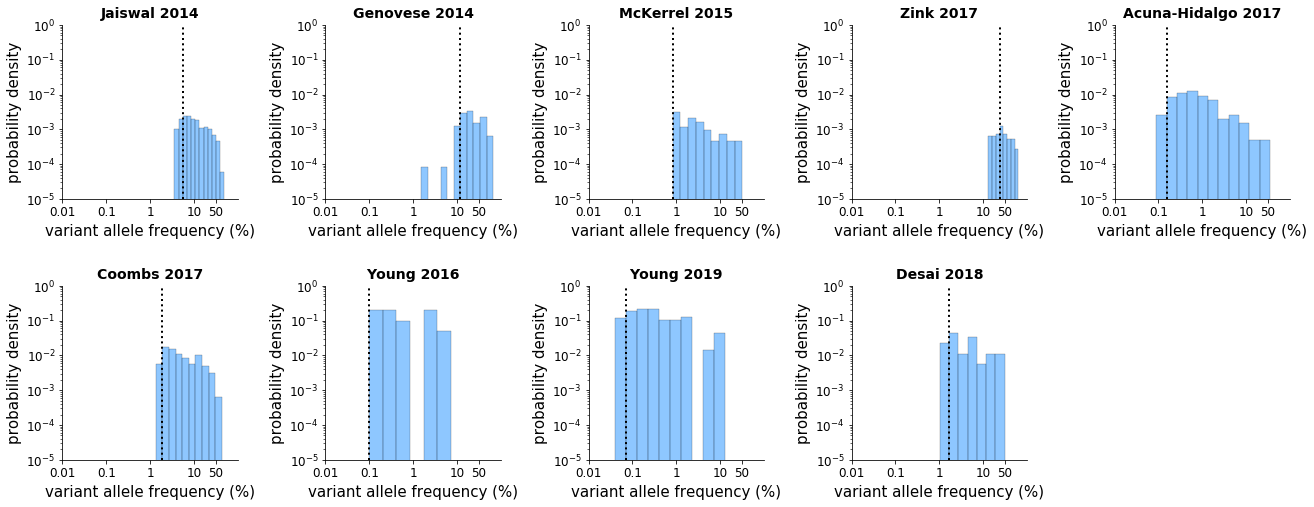

In [56]:
#logVAF vs logProbability density
plt.close('all')
fig = plt.figure(12, figsize=(22, 8))
gs = matplotlib.gridspec.GridSpec(5, 2)

ax1 = plt.subplot2grid((2, 5), (0, 0)) #Jaiswal
ax2 = plt.subplot2grid((2, 5), (0, 1)) #Genovese
ax3 = plt.subplot2grid((2, 5), (0, 2)) #Zink WGS
ax4 = plt.subplot2grid((2, 5), (0, 3)) #McKerrel
ax5 = plt.subplot2grid((2, 5), (0, 4)) #Acuna-Hidalgo
ax6 = plt.subplot2grid((2, 5), (1, 0)) #Coombs
ax7 = plt.subplot2grid((2, 5), (1, 1)) #Young 2016
ax8 = plt.subplot2grid((2, 5), (1, 2)) #Young 2019
ax9 = plt.subplot2grid((2, 5), (1, 3)) #Desai 2018

matplotlib.pyplot.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.5) #Adjust spacing between plots:  wspace = width space, #hspace = height space

binmethod = 'doane' #An improved version of Sturges’ estimator that works better with non-normal datasets.

#using the function "hist_data_for_plot" to plot histogram for each study
hist_data_for_plot(Jaiswal_DNMT3A_missense_nonsense_sorted, Jaiswaltotal, binmethod, DNMT3Acolor, 'Jaiswal 2014', Jaiswal_limit_log10, ax1)
hist_data_for_plot(Genovese_DNMT3A_missense_nonsense_sorted, Genovesetotal, binmethod, DNMT3Acolor, 'Genovese 2014', Genovese_limit_log10,ax2)
hist_data_for_plot(ZinkWGS_DNMT3A_missense_nonsense_sorted, ZinkWGStotal, binmethod, DNMT3Acolor, 'Zink 2017', ZinkWGS_limit_log10, ax4)
hist_data_for_plot(McKerrel_DNMT3A_sorted, McKerreltotal, binmethod, DNMT3Acolor, 'McKerrel 2015',McKerrel_limit_log10, ax3)
hist_data_for_plot(Acuna_DNMT3A_missense_nonsense_sorted, Acunatotal, binmethod, DNMT3Acolor, 'Acuna-Hidalgo 2017',Acuna_limit_log10, ax5)
hist_data_for_plot(Coombs_DNMT3A_missense_nonsense_sorted, Coombstotal, binmethod, DNMT3Acolor, 'Coombs 2017',Coombs_limit_log10, ax6)
hist_data_for_plot(Young2016_DNMT3A_missense_nonsense_sorted, Youngtotal, binmethod, DNMT3Acolor, 'Young 2016',Young2016_limit_log10, ax7)
hist_data_for_plot(Young2019_DNMT3A_missense_nonsense_sorted, Young2019totalcontrols, binmethod, DNMT3Acolor, 'Young 2019',Young2019_limit_log10, ax8)
hist_data_for_plot(Desai_DNMT3A_missense_nonsense_sorted, Desaitotal, binmethod, DNMT3Acolor, 'Desai 2018',Desai_limit_log10, ax9)

plt.show()